## ANN Parte 2

### Práctica ANN-3:

Modifique el código anterior, a fin de incorporar las siguientes modificaciones:

* Incorporar [Hot Encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) y contar con 3 salidas en lugar de 1. Compare los resultados.
* Generar una gráfica donde se puedan analizar las 4 variables y cómo se distribuyen la mismas (analizadas de dos en dos). Para ello, se recomienda emplear el siguente ejemplo:

<img src="imagenes/ejemplo-matrix-scatter.jpg" width="600"> 

* Pruebe la misma red neuronal pero sin escalar los datos y compare los resultados.

In [5]:
import pandas as pd
import numpy as np

%matplotlib inline

datos = pd.read_csv('corpus/iris/iris.data',names=['longitud_sepalo','grosor_sepalo',\
                                                   'longitud_petalo','grosor_petalo','flor'])

datos.head()

,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitud_sepalo,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
grosor_sepalo,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
longitud_petalo,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
grosor_petalo,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
datos['flor']=datos['flor'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
datos.head()

,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> c:\users\katherine\anaconda3\envs\ia2\lib\site-packages\viznet\context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


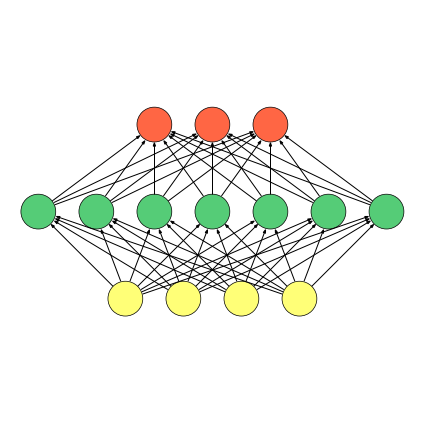

In [4]:
import numpy as np
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 4
neuronas_capa_oculta = 7
neuronas_capa_salida = 3


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()

In [8]:
# Importamos la función para separar test y train
from sklearn.model_selection import train_test_split

# Importamos la función para escalar los valores
from sklearn.preprocessing import StandardScaler


# Separamos en una variable los datos de entrada, para ello generamos una copia del dataframe
# eliminando la última columna del corpus (la que tiene los tipos de flores)
X=datos.drop('flor',axis=1)

# Procedemos de la misma forma, pero en este caso para generar un arreglo que tenga las salidas
# deseadas
d=datos['flor']

# Mostramos en pantalla los primeros datos con la función 'head'
X.head()
d.head()

# Generamos los corpus para entrenamiento y pruebas de modo que se tome el mismo número de muestras de cada clase
X_train, X_test, d_train, d_test = train_test_split(X,d,train_size=0.70,random_state=0,stratify=d)


# Generamos un objeto para escalar los valores
scaler=StandardScaler()

print(scaler)

# Ajuste solo en los datos de entrenamiento
scaler.fit(X_train)

# Escalamos el corpus de entrenamiento
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Visualizamos las 7 primeras filas de datos
X_train[1:7,:]

StandardScaler(copy=True, with_mean=True, with_std=True)


array([[ 2.14194987,  1.67393943,  1.63709442,  1.31005616],
       [ 0.62547602,  0.34908787,  0.85828251,  1.44106177],
       [-1.47425699,  1.23232224, -1.53378264, -1.31005616],
       [-0.77434598,  0.79070506, -1.31126495, -1.31005616],
       [-1.70756066, -0.09252931, -1.36689437, -1.31005616],
       [-1.12430149, -1.41738087, -0.25430593, -0.26201123]])

In [9]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(X_train,d_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(d_test.value_counts())

prediccion = mlp.predict(X_test)
print('Matriz de Confusion\n')
print(confusion_matrix(d_test, prediccion))
print('\n')

print(classification_report(d_test, prediccion))

2    15
1    15
0    15
Name: flor, dtype: int64
Matriz de Confusion

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



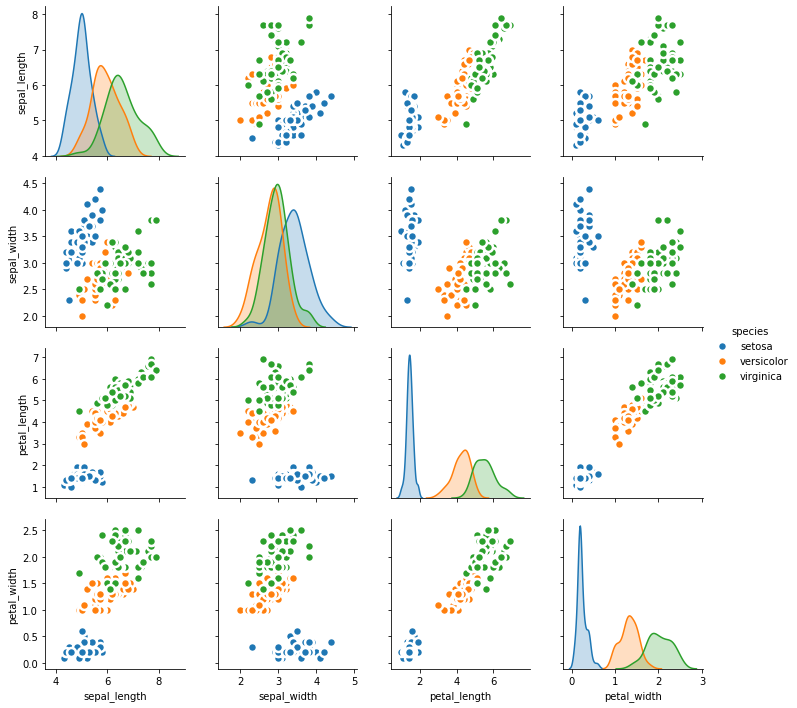

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
# right: you can give other arguments with plot_kws.
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### Práctica ANN-4:

Reproducir el mismo experimento para el corpus del censo realizado en el año 1996 (**censo**), considerando las siguientes premisas:

1. Realizar todas las fases de diseño, entrenamiento y validación de la red neuronal
2. Probar la red con el método de validación visto, y realizar el contraste de forma manual
3. Realizar la gráfica de los datos

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
datos = pd.read_csv('corpus/censo/censo.data',names=['edad','clase_trabajo',\
'fnlwgt','educacion','numero_educacion',\
'estado_civil', 'ocupacion', 'relacion',\
'raza','sexo','capital_obtenido','capital_perdido',\
'hora_semana','pais_natal','ganancia'])
datos.head()

,edad,clase_trabajo,fnlwgt,educacion,numero_educacion,estado_civil,ocupacion,relacion,raza,sexo,capital_obtenido,capital_perdido,hora_semana,pais_natal,ganancia
0,39,5,77516,0,13,2,8,3,0,1,2174,0,40,0,<=50K
1,50,1,83311,0,13,0,4,2,0,1,0,0,13,0,<=50K
2,38,0,215646,3,9,1,6,3,0,1,0,0,40,0,<=50K
3,53,0,234721,2,7,0,6,2,4,1,0,0,40,0,<=50K
4,28,0,338409,0,13,0,5,0,4,0,0,0,40,12,<=50K


In [7]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
edad,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
clase_trabajo,32561.0,0.695556,1.431021,0.0,0.0,0.0,0.0,7.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
educacion,32561.0,3.403090,3.461691,0.0,1.0,3.0,4.0,15.0
numero_educacion,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
estado_civil,32561.0,1.077485,1.185543,0.0,0.0,1.0,2.0,6.0
ocupacion,32561.0,4.467215,3.089648,0.0,2.0,4.0,7.0,13.0
relacion,32561.0,2.380854,1.237468,0.0,2.0,2.0,3.0,5.0
raza,32561.0,0.459752,1.211933,0.0,0.0,0.0,0.0,4.0
sexo,32561.0,0.669205,0.470506,0.0,0.0,1.0,1.0,1.0


In [8]:
datos['ganancia']=datos['ganancia'].map({' <=50K':0,' >50K':1})
datos.head()

,edad,clase_trabajo,fnlwgt,educacion,numero_educacion,estado_civil,ocupacion,relacion,raza,sexo,capital_obtenido,capital_perdido,hora_semana,pais_natal,ganancia
0,39,5,77516,0,13,2,8,3,0,1,2174,0,40,0,0
1,50,1,83311,0,13,0,4,2,0,1,0,0,13,0,0
2,38,0,215646,3,9,1,6,3,0,1,0,0,40,0,0
3,53,0,234721,2,7,0,6,2,4,1,0,0,40,0,0
4,28,0,338409,0,13,0,5,0,4,0,0,0,40,12,0


Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> c:\users\katherine\anaconda3\envs\ia2\lib\site-packages\viznet\context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


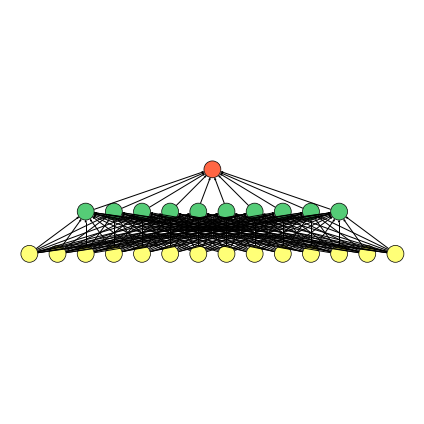

In [11]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow
# Creamos variables con los parametros que tendra la red
entradas = 14
neuronas_capa_oculta = 10
neuronas_capa_salida = 1

def dibujar_red_neuronal(ax, num_node_list):
    
    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))
    
    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))
        
    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)
        
def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])
real_bp()

In [12]:
# Importamos la función para separar test y train
from sklearn.model_selection import train_test_split
# Importamos la función para escalar los valores
from sklearn.preprocessing import StandardScaler
# Separamos en una variable los datos de entrada, para ello generamos una copia del dataframe
# eliminando la última columna del corpus (la que tiene los tipos de flores)
15
X=datos.drop('ganancia',axis=1)
# Procedemos de la misma forma, pero en este caso para generar un arreglo que tenga las salidas
# deseadas
d=datos['ganancia']
# Mostramos en pantalla los primeros datos con la función 'head'
X.head()
d.head()
# Generamos los corpus para entrenamiento y pruebas de modo que se tome el mismo número de muestras de cada clase
X_train, X_test, d_train, d_test = train_test_split(X,d,train_size=0.70,random_state=0,stratify=d)
# Generamos un objeto para escalar los valores
scaler=StandardScaler()
print(scaler)
# Ajuste solo en los datos de entrenamiento
scaler.fit(X_train)
# Escalamos el corpus de entrenamiento
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# Visualizamos las 7 primeras filas de datos
X_train[1:7,:]


StandardScaler(copy=True, with_mean=True, with_std=True)


array([[-0.55572384, -0.48452334,  0.51812212, -0.69336256, -0.02852907,
         0.77715866, -0.1518407 ,  0.49518216, -0.38148372,  0.7024814 ,
        -0.1467584 , -0.21325687,  0.37734553,  2.22822741],
       [-0.40938086, -0.48452334,  3.9655581 ,  0.45769227,  0.74555959,
         3.30433802,  0.81973519,  2.10473604, -0.38148372,  0.7024814 ,
        -0.1467584 , -0.21325687, -0.02814524, -0.26936853],
       [ 1.49307783,  0.21636876, -0.50397404,  1.32098339, -2.35079505,
        -0.90762758,  1.46745245, -0.30959478, -0.38148372,  0.7024814 ,
        -0.1467584 , -0.21325687,  0.62063999, -0.26936853],
       [ 0.24916253, -0.48452334, -1.51443788, -0.69336256, -0.02852907,
        -0.06523446,  0.81973519,  0.49518216, -0.38148372, -1.42352524,
        -0.1467584 , -0.21325687, -0.02814524, -0.26936853],
       [-1.14109574, -0.48452334, -0.2602334 , -0.98112627,  1.13260393,
         0.77715866, -0.47569934,  0.49518216, -0.38148372,  0.7024814 ,
        -0.1467584 , -0.21

In [13]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier
# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))
print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(X_train,d_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 1), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 1), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(d_test.value_counts())
prediccion = mlp.predict(X_test)
print('Matriz de Confusion\n')
print(confusion_matrix(d_test, prediccion))
print('\n')
print(classification_report(d_test, prediccion))

0    7417
1    2352
Name: ganancia, dtype: int64
Matriz de Confusion

[[6922  495]
 [ 954 1398]]


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7417
           1       0.74      0.59      0.66      2352

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769

